# Problem Statement

Jahanna Chronicle, a technology company based in Lunakick, has reached out to you with a task that involves predicting the impact of a tweet and prepare a report on your analysis. You could think about ‘impact’ as a value that could help Jahanna Chronicle decide if the tweet could go viral. 



There are 15 features and 1 dependent variable (also called as the output variable; Here it is named as ‘impact’). 
- Post Content - The text in the tweet
- Sentiment score - Ranges from -20 to +20 (0 - neutral)
- Post Length - The length of the tweet
- Hashtag Count - The number of hashtags used in the tweet
- Content URL Count - The number of URLs mentioned in the tweet
- Tweet Count - The total number of tweets posted by the author of the tweet
- Followers Count - The number of followers of the author of the post
- Listed Count - the number of lists the post author is a part of
- Media Type - The media type of the post (Text, image, video)
- Published Datetime - The published time of the tweet
- Mentions Count - The number of user mentions in the tweet
- Post Author Verified - 1 if author is a verified user
- Likes - Likes received for the tweet
- Shares - Retweets received for the tweet
- Comments - Number of comments for the tweet

In [1]:
#mount drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive

# list the contents of /mydrive
!ls /mydrive

#Navigate to /mydrive/CircusSocial
%cd /mydrive/CircusSocial

/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists
 CircusSocial  'Colab Notebooks'  'My Drive'   yolov4
/content/gdrive/My Drive/CircusSocial


### Importing required libraries 📤

In [2]:
!pip install -U seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.7/dist-packages (0.11.1)


In [3]:
!pip install -U yellowbrick

Requirement already up-to-date: yellowbrick in /usr/local/lib/python3.7/dist-packages (1.3.post1)


In [4]:
import pandas as pd
from pandas.api.types import is_numeric_dtype, is_object_dtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet, BayesianRidge,RANSACRegressor,HuberRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error, make_scorer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,  f_classif

### Loading the dataset 💾
There is one unknown column in the dataset so I decided to provide custom headers for the dataset so that here is no problem caused while access those columns in dataframe.

In [5]:
pd.set_option('display.max_colwidth', -1) #To see the full length data in dataframe
dataset = pd.read_csv('Twitter.csv', header=0, names=['random_id','id','post_content','sentiment_score', 'post_length', 'hashtag_count', 'content_url_count', 'tweet_count', 'followers_count', 'listed_count', 'media_type', 'published_datetime', 'mentions_count', 'post_author_verified', 'likes', 'shares', 'comments', 'impact'])
dataset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


random_id                                        id  ... comments  impact
0  41370      6d967b125fcecba6357dbc43f8f380cf2d6d7a51  ...  0.0      0.0   
1  27955      22dc5f808a8589186767412f39e5c88ae9753d04  ...  0.0      110.0 
2  38151      7f224e66ad757e3066d45947881bcaab91f8e57f  ...  0.0      0.0   
3  13558      5acc220e7a337efafc4c847b7f74680ca2515890  ...  4.0      6830.0
4  17071      863abf834897a06afdc459788b34abeae6298f3a  ...  0.0      0.0   

[5 rows x 18 columns]

#### Getting info about the dataset
Like what is datatype of each column and how many null values it contains

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   random_id             50000 non-null  int64  
 1   id                    50000 non-null  object 
 2   post_content          50000 non-null  object 
 3   sentiment_score       50000 non-null  float64
 4   post_length           50000 non-null  float64
 5   hashtag_count         50000 non-null  float64
 6   content_url_count     50000 non-null  float64
 7   tweet_count           50000 non-null  float64
 8   followers_count       50000 non-null  float64
 9   listed_count          50000 non-null  int64  
 10  media_type            50000 non-null  object 
 11  published_datetime    50000 non-null  object 
 12  mentions_count        50000 non-null  float64
 13  post_author_verified  50000 non-null  float64
 14  likes                 50000 non-null  float64
 15  shares             

#### Getting the shape of the dataset
How many columns and records the dataset contains.

In [7]:
dataset.shape

(50000, 18)

So we can see that the dataset contains 50000 records and 18 columns (features)

### Lets get the description of our dataset
Like what mean, standard deviation and quartiles the datasets has:

## SUMMARY OF DATA

- Total Samples
- Total Features
- Total Categorical Features
- Total Numerical Features
- Stats of Numerical Features
- Value Count of Categorical Features
- Unique Values DataFrame
- Null Values DataFrame

In [8]:
def get_summary(df):
    
    num_features = []
    cat_features = []
    
    for col in df.columns:
        if is_numeric_dtype(df[col]):
            num_features.append(col)
                
        if is_object_dtype(df[col]):
            cat_features.append(col)
            
    return num_features, cat_features

def get_unique_df(features):
    unique_df = pd.DataFrame(columns=['Feature', 'Unique', 'Count'])
    for col in features.columns:
        v = features[col].unique()
        l = len(v)
        unique_df = unique_df.append({'Feature':col, 
                                     'Unique':v,
                                     'Count':l}, ignore_index=True)
    return unique_df

def get_null_df(features):
    col_null_df = pd.DataFrame(columns = ['Column', 'Type', 'Total NaN', '%'])
    col_null = features.columns[features.isna().any()].to_list()
    L = len(features)
    for col in col_null:
        T = 0
        if is_numeric_dtype(features[col]):
            T = "Numerical"  
        else:
            T = "Categorical"
        nulls = len(features[features[col].isna() == True][col])   
        col_null_df = col_null_df.append({'Column': col, 
                                          'Type': T,
                                          'Total NaN': nulls,
                                          '%': (nulls / L)*100
                                         }, ignore_index=True)
        
    return col_null_df

def summary(data):
    
    print("Samples --> ", len(data))
    print()
    target = data['impact']
    features = data.drop(['impact'], axis=1)
    print("Features --> ", len(features.columns))
    print("\n",features.columns)
    
    num_features, cat_features = get_summary(features)
      
    print()
    print("\nNumerical Features --> ", len(num_features))
    print()
    print(num_features)
    print()
    print("Categorical Features -->", len(cat_features))
    print()
    print(cat_features)
    print()
    print("*************************************************")
    stats = features.describe().T
    
    print()
    print("Value counts of each categorical feature\n")
    for col in cat_features:
        print(col)
        print(features[col].value_counts())
        print()
        
    unique_df = get_unique_df(features)
    
    col_null_df = get_null_df(features)
    
    return {'features':features, 
            'target': target, 
            'stats': stats, 
            'unique_df':unique_df,
            'col_null_df': col_null_df}

In [9]:
df_summary = summary(dataset)

Samples -->  50000

Features -->  17

 Index(['random_id', 'id', 'post_content', 'sentiment_score', 'post_length',
       'hashtag_count', 'content_url_count', 'tweet_count', 'followers_count',
       'listed_count', 'media_type', 'published_datetime', 'mentions_count',
       'post_author_verified', 'likes', 'shares', 'comments'],
      dtype='object')


Numerical Features -->  13

['random_id', 'sentiment_score', 'post_length', 'hashtag_count', 'content_url_count', 'tweet_count', 'followers_count', 'listed_count', 'mentions_count', 'post_author_verified', 'likes', 'shares', 'comments']

Categorical Features --> 4

['id', 'post_content', 'media_type', 'published_datetime']

*************************************************

Value counts of each categorical feature

id
714f2a7090c238f9ccfadac987959a0cfea28c45    4
facf15daa1a6141b156fd4c59c1736585c3b43f8    4
40a5f17764aab086fb621ee3dd8d9e083b668882    4
5e2514cfe00b65813cc6148712e5854ee8e7ff7d    4
6187ee9b5c10fdb306a57622ea4befc2849b

In [10]:
# Features with null values
df_summary['col_null_df']

Empty DataFrame
Columns: [Column, Type, Total NaN, %]
Index: []

In [11]:
# stats of the numerical feature
df_summary['stats']

count          mean  ...         75%          max
random_id             50000.0  1.419358e+04  ...  20650.25    43879.0    
sentiment_score       50000.0  1.068916e+00  ...  0.00        20.0       
post_length           50000.0  1.546924e+02  ...  215.00      373.0      
hashtag_count         50000.0  6.875200e-01  ...  1.00        21.0       
content_url_count     50000.0  4.802600e-01  ...  1.00        7.0        
tweet_count           50000.0  2.414257e+05  ...  259501.50   50444081.0 
followers_count       50000.0  4.648759e+06  ...  2809978.25  114440557.0
listed_count          50000.0  1.006968e+04  ...  6171.00     568139.0   
mentions_count        50000.0  1.137200e-01  ...  0.00        12.0       
post_author_verified  50000.0  6.264800e-01  ...  1.00        1.0        
likes                 50000.0  3.020706e+03  ...  1909.00     90919.0    
shares                50000.0  9.667733e+02  ...  559.00      79671.0    
comments              50000.0  1.640792e+01  ...  0.00        66939.0    

[13 rows x 8 columns]

In [12]:
target = df_summary['target']
target

0        0.0   
1        110.0 
2        0.0   
3        6830.0
4        0.0   
        ...    
49995    0.0   
49996    0.0   
49997    0.0   
49998    30.0  
49999    0.0   
Name: impact, Length: 50000, dtype: float64

### PREPROCESSING

- Drop Duplicates
- Drop uninformative columns
- Drop Columns with single unique values
- Outlier Analysis and Removal
- Drop Columns with single unique values again after outlier analysis

#### Dropping Duplicates


In [13]:
#check Duplicate Values
dataset.duplicated().sum()

0

In [14]:
# remove Duplicate Values
dataset.drop_duplicates(inplace=True)
dataset.duplicated().sum()

0

#### Dropping uninformative columns
random_id, id, post_content, published_datetime as there won't help in predicting the impact.

In [15]:
dataset.drop(['random_id','id', 'post_content', 'published_datetime'], axis=1, inplace=True)

In [16]:
dataset.head()

sentiment_score  post_length  hashtag_count  ...  shares  comments  impact
0  0.0              17.0         0.0            ...  0.0     0.0       0.0   
1  19.3             84.0         0.0            ...  1.0     0.0       110.0 
2  0.0              78.0         0.0            ...  0.0     0.0       0.0   
3  0.0              284.0        2.0            ...  219.0   4.0       6830.0
4 -20.0             80.0         0.0            ...  0.0     0.0       0.0   

[5 rows x 14 columns]

In [17]:
new_df = dataset

#### Drop columns with single unique value

In [18]:
df_summary['unique_df'][df_summary['unique_df']['Count']==1]

Empty DataFrame
Columns: [Feature, Unique, Count]
Index: []

In [19]:
cleaned_df = dataset

#### Outlier Analysis and Removal

- Using IQR

In [20]:
def calc_interquartile(df, column):
    
    #calculating the first and third quartile
    first_quartile, third_quartile = np.percentile(df[column], 25), np.percentile(df[column], 75)
    
    #calculate the interquartilerange
    iqr = third_quartile - first_quartile
    
    # outlier cutoff (1.5 is a generally taken as a threshold thats why i am also taking it)
    cutoff = iqr*1.5
    
    #calculate the lower and upper limits
    lower, upper = first_quartile - cutoff , third_quartile + cutoff
    
    #remove the outliers from the columns
    upper_outliers = df[df[column] > upper]
    lower_outliers = df[df[column] < lower]
    
    return lower, upper, lower_outliers.shape[0]+upper_outliers.shape[0]


def get_outliers(df, num_feat):
    
    outlier_df = pd.DataFrame(columns=['Feature', 'Total Outliers','Upper limit', 'Lower limit'])
    
    for col in num_feat:
        lower, upper, total = calc_interquartile(df, col)
        if total != 0 and (upper !=0 and lower!=0):
            outlier_df = outlier_df.append({'Feature':col, 'Total Outliers': total,
                                       'Upper limit': upper, 'Lower limit':lower}, ignore_index=True)
        
    return outlier_df

num_feat, _ = get_summary(cleaned_df)

outlier_df = get_outliers(cleaned_df, num_feat)
outlier_df

Feature Total Outliers  Upper limit  Lower limit
0  hashtag_count      4236           2.500       -1.500      
1  content_url_count  59             2.500       -1.500      
2  tweet_count        3099           631897.125  -361157.875 
3  followers_count    6932           7009137.125 -4188619.875
4  listed_count       6896           15424.500   -9251.500   
5  likes              7788           4771.000    -2861.000   
6  shares             7321           1397.500    -838.500    
7  impact             7463           68735.000   -41225.000

In [21]:
def remove_outliers(df, outlier_df, num_feat):
    
    for col in outlier_df['Feature'].to_list():
        upper = outlier_df[outlier_df['Feature']== col ]['Upper limit'].values[0]
        lower = outlier_df[outlier_df['Feature']== col ]['Lower limit'].values[0]
        
        df[col] = np.where(df[col]>upper, upper, df[col])
        df[col] = np.where(df[col]<lower, lower, df[col])
        
    return df

cleaned_df = remove_outliers(cleaned_df, outlier_df, num_feat)

In [22]:
get_outliers(cleaned_df, num_feat)

Empty DataFrame
Columns: [Feature, Total Outliers, Upper limit, Lower limit]
Index: []

In [23]:
print(cleaned_df.shape)

(50000, 14)


#### Drop Columns with single unique values again after outlier analysis

In [24]:
unique_df = get_unique_df(cleaned_df)
unique_df

Feature  ...  Count
0   sentiment_score       ...  2100 
1   post_length           ...  329  
2   hashtag_count         ...  4    
3   content_url_count     ...  4    
4   tweet_count           ...  36323
5   followers_count       ...  32673
6   listed_count          ...  8252 
7   media_type            ...  3    
8   mentions_count        ...  13   
9   post_author_verified  ...  2    
10  likes                 ...  4063 
11  shares                ...  1390 
12  comments              ...  465  
13  impact                ...  5328 

[14 rows x 3 columns]

In [25]:
# columns with single unique values
unique_df[unique_df['Count']==1]

Empty DataFrame
Columns: [Feature, Unique, Count]
Index: []

So, after removing of outliers and again checking for columns having single unique values we find no such column so we are good to go.

#### FEATURE TRANSFORMATION

- Changing the distribution of numerical features to Gaussian (Normal)
- We will apply power transform (Yeo-Johnson) on the features.

In [26]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [27]:
trans_df = cleaned_df.copy()
num_feat, _ = get_summary(cleaned_df)

def transformed_feat(trans_df, new_test_df, num_feat):
    
    for col in num_feat:
        t = scaler.fit_transform(np.array(cleaned_df[col]).reshape(-1,1))
        trans_df[col] = t.reshape(-1)
        t = scaler.transform(np.array(cleaned_df[col]).reshape(-1, 1))
        cleaned_df[col] = t.reshape(-1)
        
    return trans_df, cleaned_df

trans_df, cleaned_df = transformed_feat(trans_df, cleaned_df, num_feat)

In [28]:
trans_df.head()

sentiment_score  post_length  hashtag_count  ...    shares  comments    impact
0 -0.082484        -2.167455    -0.714677       ... -1.207718 -0.391047 -1.409552
1  1.709621        -0.855102    -0.714677       ... -0.969243 -0.391047 -0.577791
2 -0.082484        -0.948955    -0.714677       ... -1.207718 -0.391047 -1.409552
3 -0.082484         1.497271     1.533394       ...  0.666633  2.620510  0.480472
4 -2.076353        -0.917374    -0.714677       ... -1.207718 -0.391047 -1.409552

[5 rows x 14 columns]

### VISUALIZE

- Scatterplot and distribution of numerical features
- BarCharts of categorical features
- Box plots to check the outliers

In [29]:
num_feat, cat_feat = get_summary(trans_df)

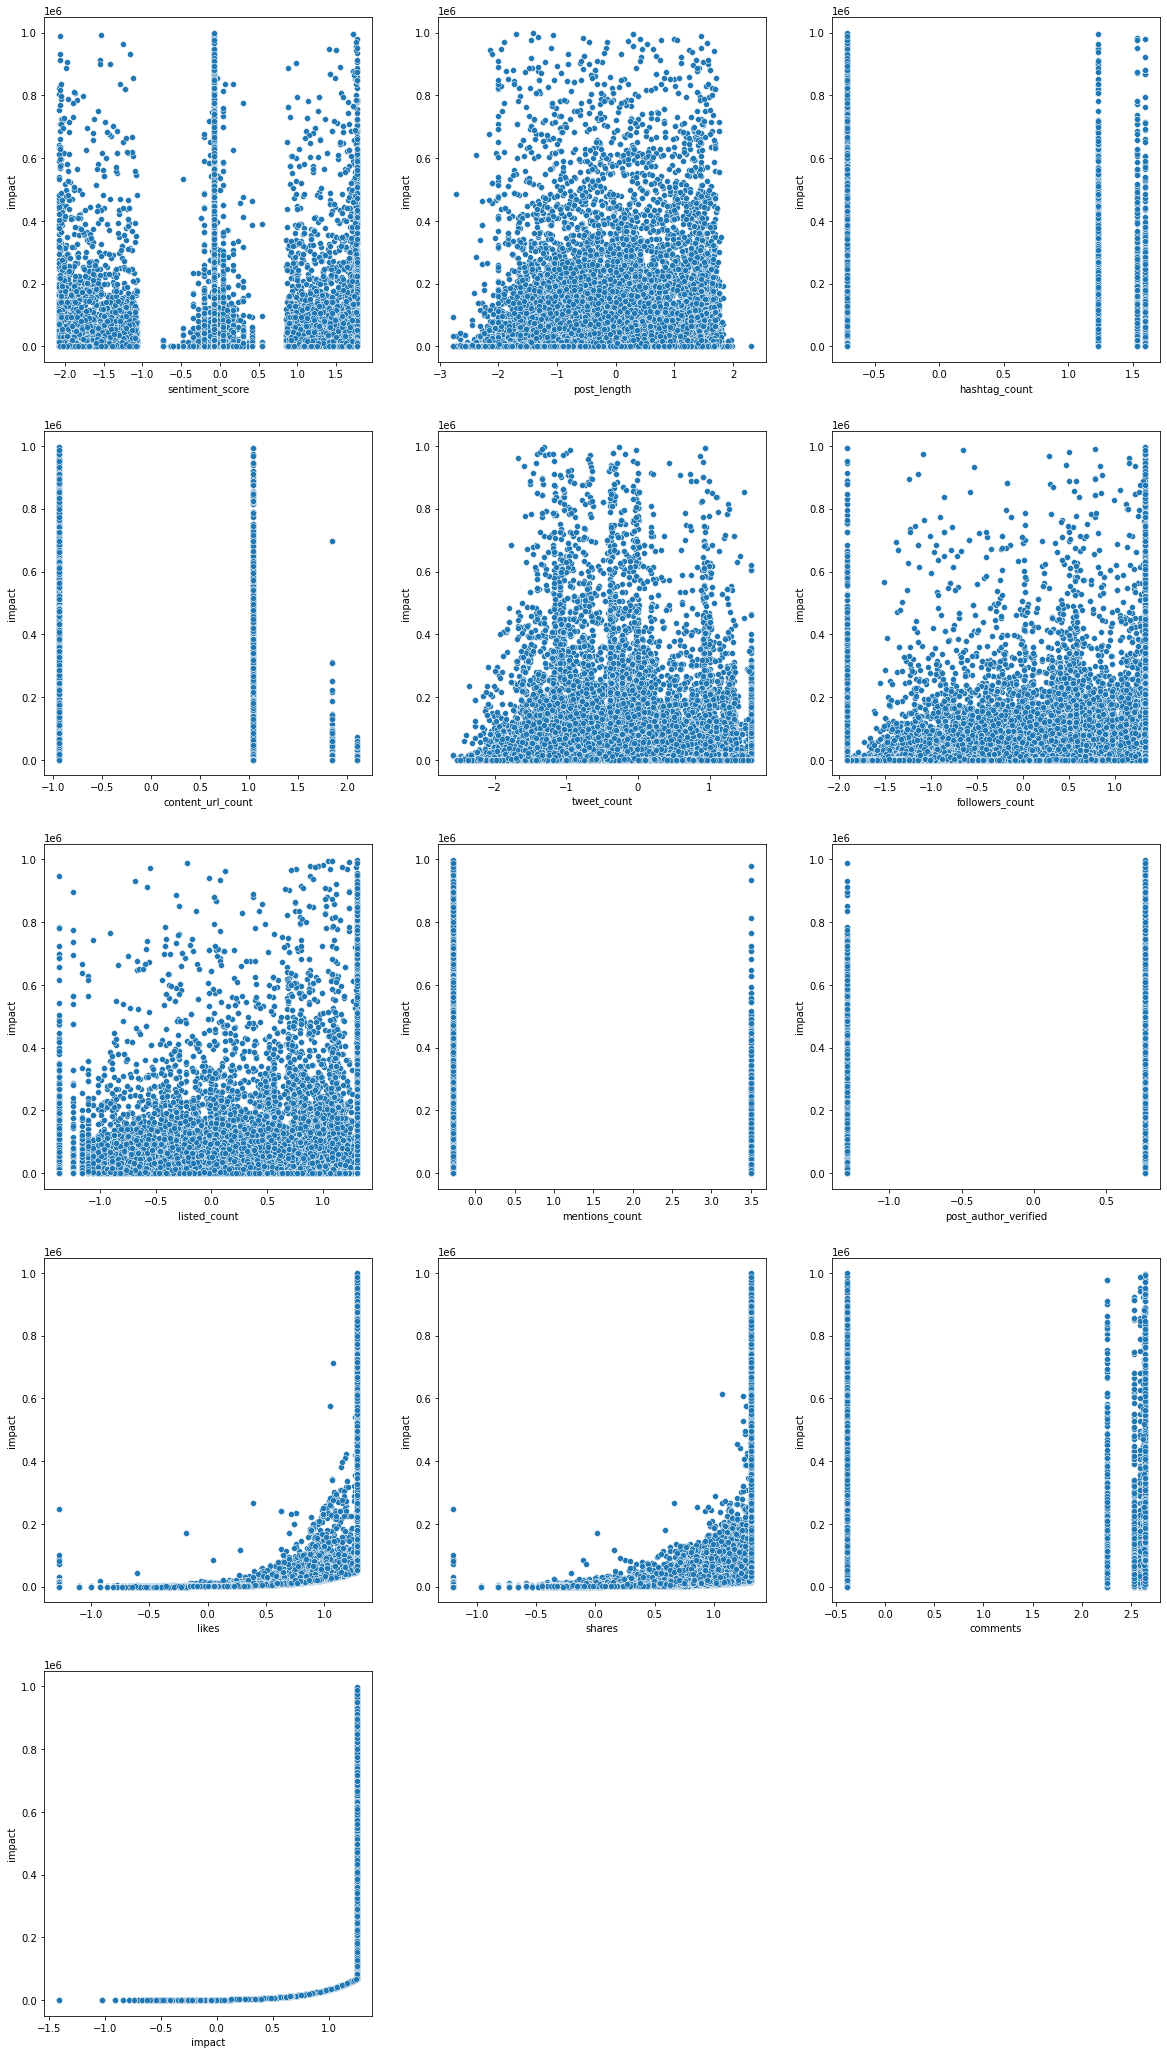

In [30]:
#  Scatterplot for numerical features

plt.figure(figsize=(20,90))
for i in range(len(num_feat)):
    plt.subplot(12, 3, i+1)
    sns.scatterplot(x=trans_df[num_feat[i]], y=target)

plt.show()

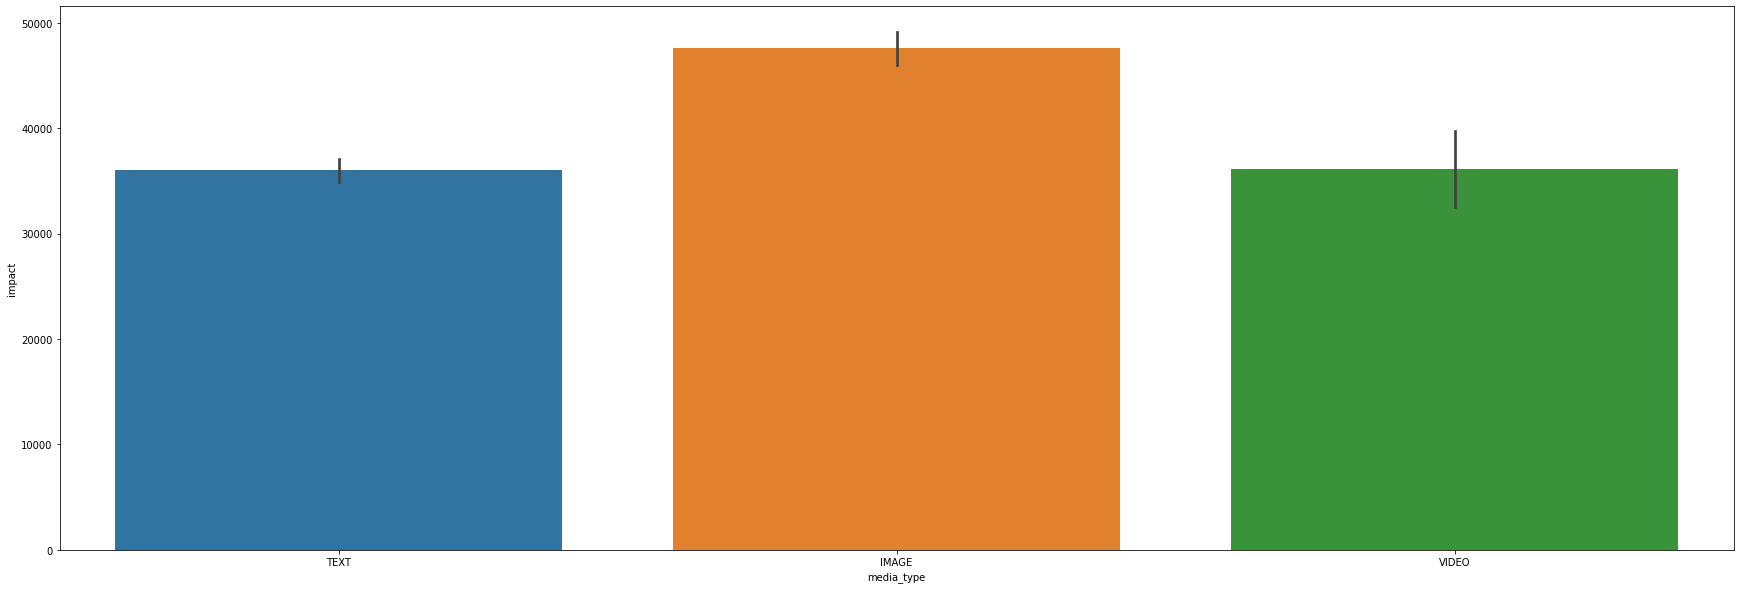

In [31]:
#  Bar Plot for Categorical Features
for col in cat_feat:
    plt.figure(figsize=(30, 10))
    sns.barplot(x=trans_df[col], y=target)
    plt.show()

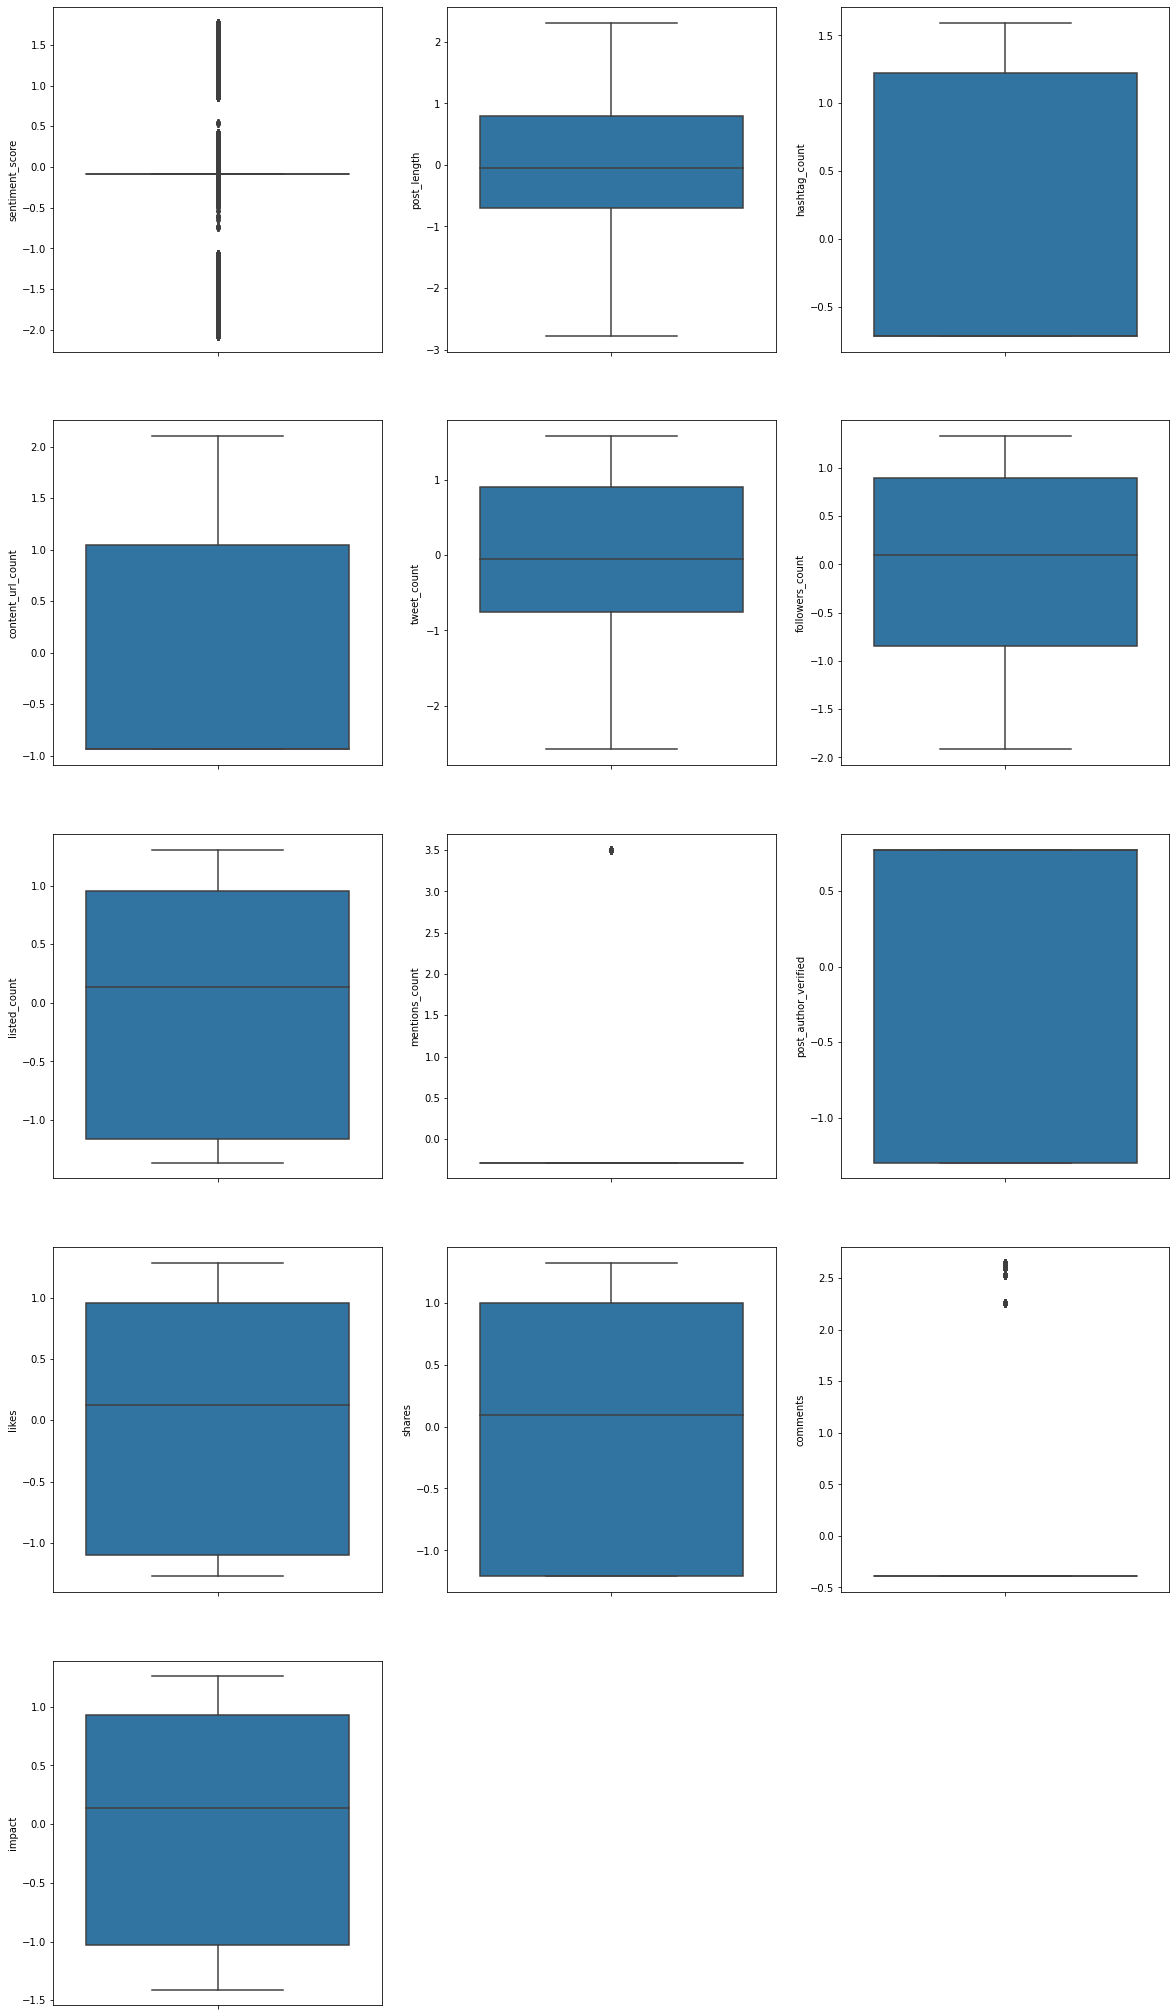

In [32]:
# Box Plot of Numerical Features

plt.figure(figsize=(20,90))
for i in range(len(num_feat)):
    plt.subplot(12, 3, i+1)
    sns.boxplot(y=trans_df[num_feat[i]])

plt.show()

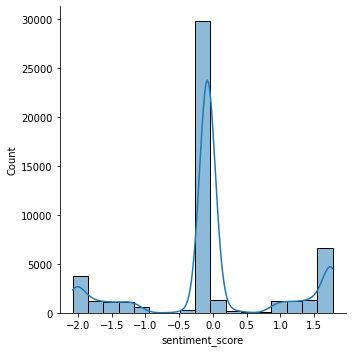

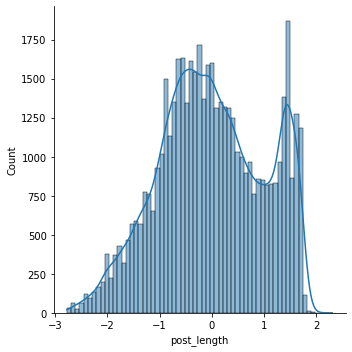

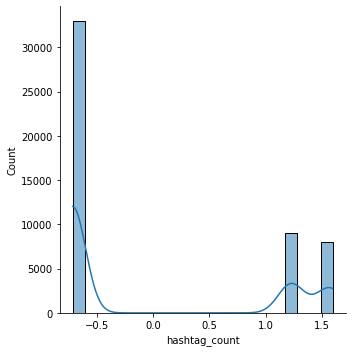

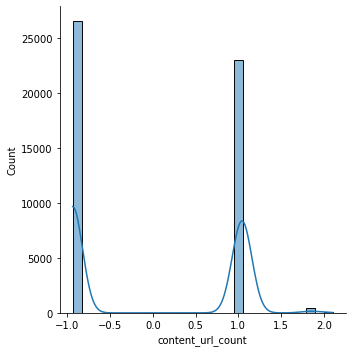

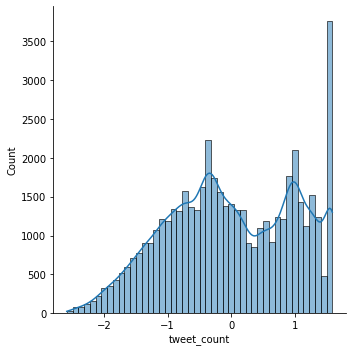

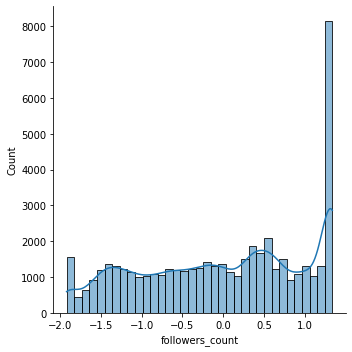

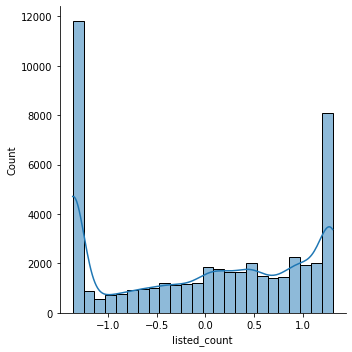

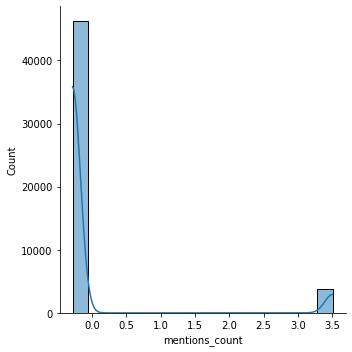

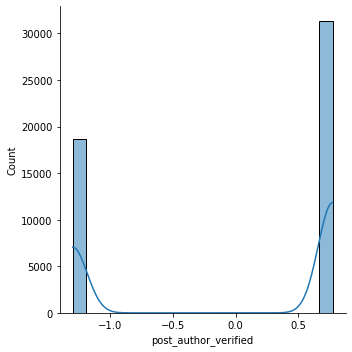

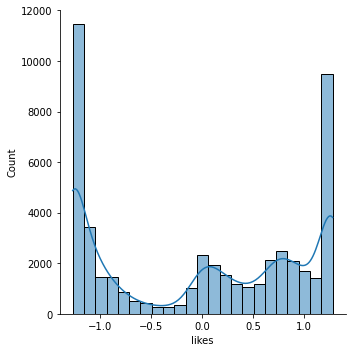

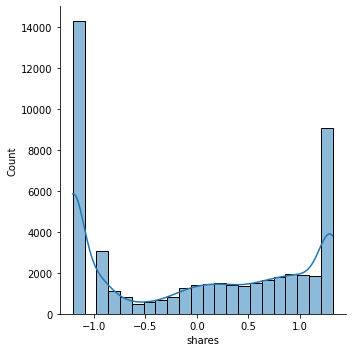

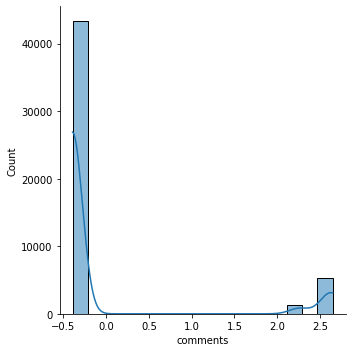

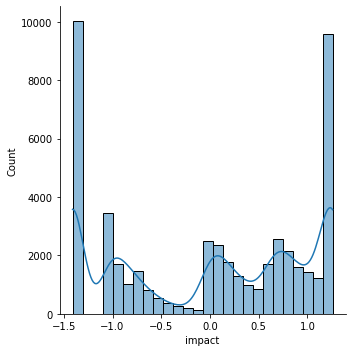

In [33]:
# Distribution Plots
for i in num_feat:
    sns.displot(x=trans_df[i], kde=True)
    plt.show()

### ENCODING

Label Encoding

In [34]:
label = LabelEncoder()
trans_df['media_type'] = label.fit_transform(trans_df['media_type'])
trans_df.head()

sentiment_score  post_length  hashtag_count  ...    shares  comments    impact
0 -0.082484        -2.167455    -0.714677       ... -1.207718 -0.391047 -1.409552
1  1.709621        -0.855102    -0.714677       ... -0.969243 -0.391047 -0.577791
2 -0.082484        -0.948955    -0.714677       ... -1.207718 -0.391047 -1.409552
3 -0.082484         1.497271     1.533394       ...  0.666633  2.620510  0.480472
4 -2.076353        -0.917374    -0.714677       ... -1.207718 -0.391047 -1.409552

[5 rows x 14 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


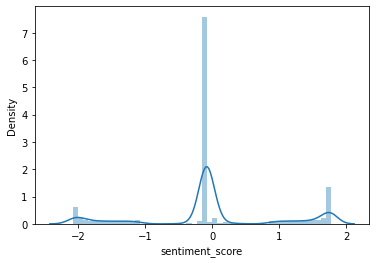

In [35]:
# Observing the sentiment_score distribution
sns.distplot(trans_df['sentiment_score'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


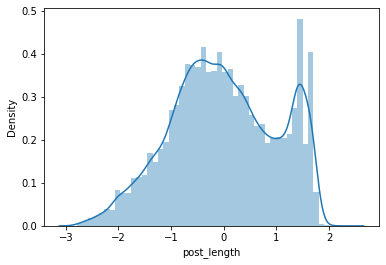

In [36]:
# Observing the post_length distribution
sns.distplot(trans_df['post_length'])

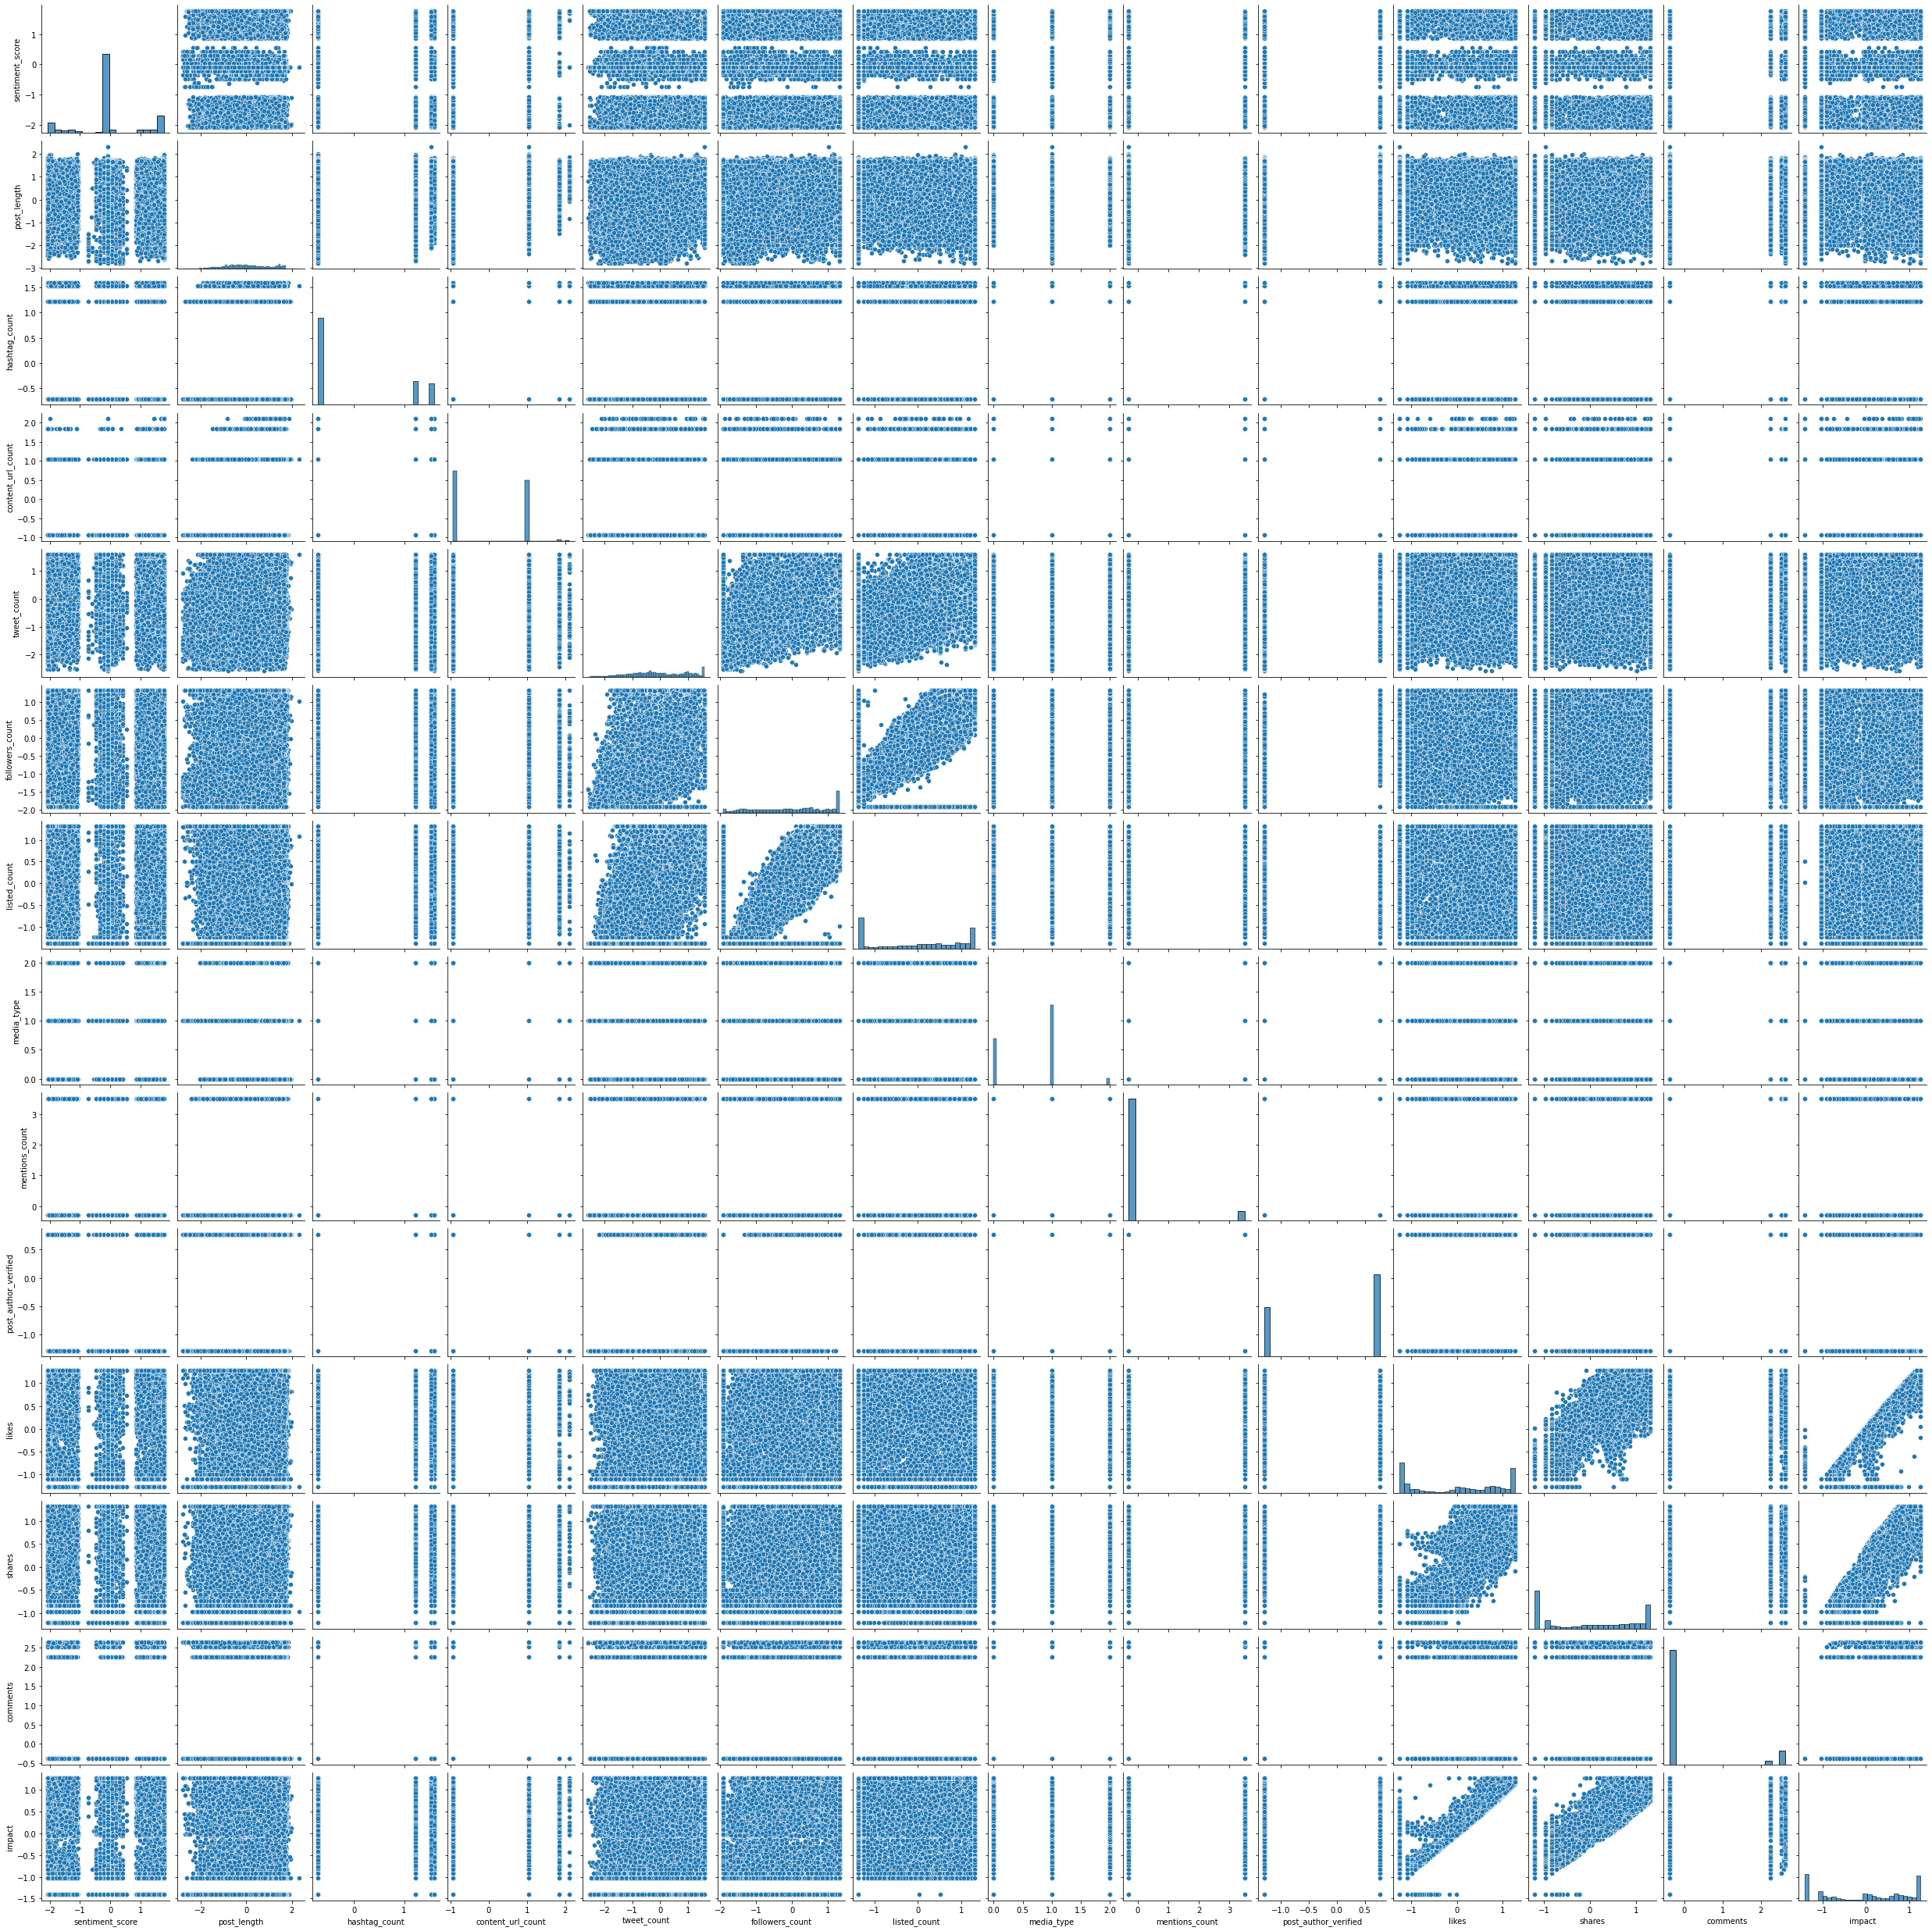

In [37]:
sns.pairplot(trans_df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


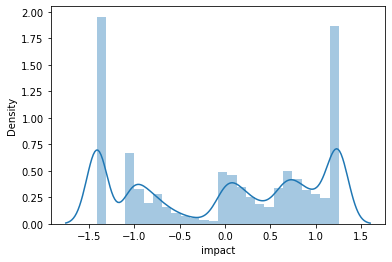

In [38]:
sns.distplot(trans_df['impact'])

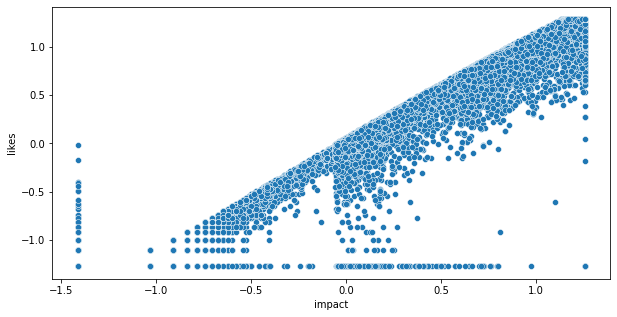

In [39]:
#scatter plot
plt.figure(figsize=(10,5))
sns.scatterplot(x='impact',y='likes',data=trans_df)

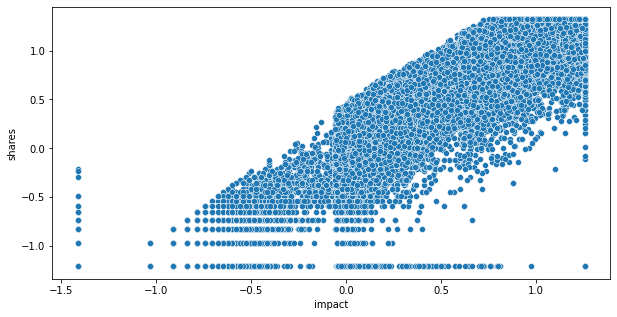

In [40]:
#scatter plot
plt.figure(figsize=(10,5))
sns.scatterplot(x='impact',y='shares',data=trans_df)

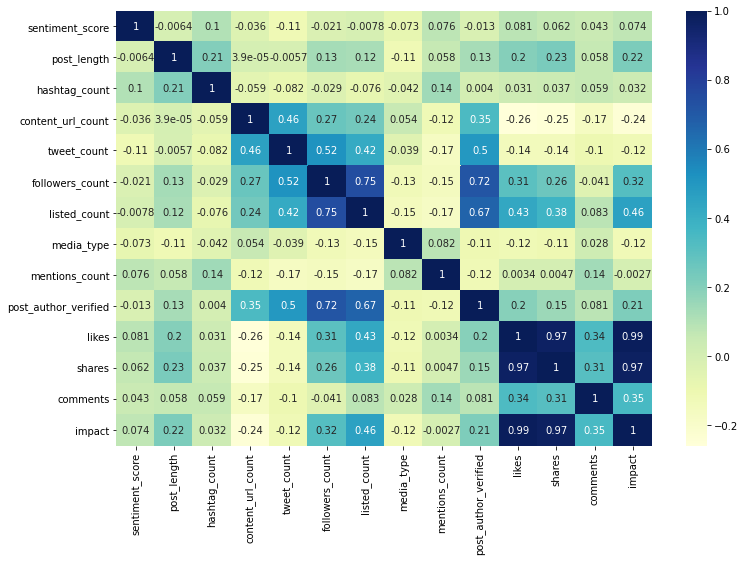

In [41]:
# Correlation 
corr=trans_df.corr()
f,ax=plt.subplots(1,1,figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="YlGnBu", ax=ax)

From above correlation matrix we can see that there is high correlation between *likes* and *shares* on *impact* our target column

### MODEL TRAINING & EVALUATION

In [42]:
X = trans_df[['sentiment_score', 'post_length', 'hashtag_count', 'content_url_count', 'tweet_count', 'followers_count', 'listed_count', 'media_type', 'mentions_count', 'post_author_verified', 'likes', 'shares', 'comments']]
y = trans_df['impact']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
sc = ('Scaler', StandardScaler())
est =[]
est.append(('LinearRegression', Pipeline([sc, ('LinearRegression', LinearRegression())])))
est.append(('Ridge', Pipeline([sc, ('Ridge', Ridge())])))
est.append(('Lasso', Pipeline([sc, ('Lasso', Lasso())])))
est.append(('BayesianRidge', Pipeline([sc, ('BayesianRidge', BayesianRidge())])))
est.append(('ElasticNet', Pipeline([sc,('Elastic', ElasticNet())])))
est.append(('SGD', Pipeline([sc,('SGD', SGDRegressor())])))
est.append(('Huber', Pipeline([sc,('Huber', HuberRegressor())])))
est.append(('RANSAC', Pipeline([sc,('RANSAC', RANSACRegressor())])))
est.append(('GradientBoosting', Pipeline([sc,('GradientBoosting',GradientBoostingRegressor())])))
est.append(('AdaBoost', Pipeline([sc, ('AdaBoost', AdaBoostRegressor())])))
est.append(('ExtraTree', Pipeline([sc,('ExtraTrees', ExtraTreesRegressor())])))
est.append(('RandomForest', Pipeline([sc,('RandomForest', RandomForestRegressor())]))) 
est.append(('Bagging', Pipeline([sc,('Bagging', BaggingRegressor())])))
est.append(('KNeighbors', Pipeline([sc,('KNeighbors', KNeighborsRegressor())])))
est.append(('DecisionTree', Pipeline([sc,('DecisionTree', DecisionTreeRegressor())])))
est.append(('XGB', Pipeline([sc,('XGB', XGBRegressor())])))

In [45]:
import warnings
warnings.filterwarnings(action='ignore')
seed = 4
splits = 7
models_score ={}
for i in est:
    kfold = KFold(n_splits=splits, random_state=seed, shuffle=True)
    results = cross_val_score(i[1], X_train, y_train, cv=kfold)
    models_score.update({i[0] : results.mean()})
    
sorted(models_score.items(), key= lambda v:v[1], reverse=True)

[04:57:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:57:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:57:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:57:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:57:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:57:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:57:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[('RandomForest', 0.9991461393847505),
 ('ExtraTree', 0.9990775940740624),
 ('Bagging', 0.9990635779089739),
 ('DecisionTree', 0.9986158627819132),
 ('GradientBoosting', 0.9986018044958724),
 ('XGB', 0.9983971768547564),
 ('Ridge', 0.983444852003023),
 ('BayesianRidge', 0.9834448509240641),
 ('LinearRegression', 0.9834448509150887),
 ('SGD', 0.9833999753138272),
 ('RANSAC', 0.9830780455275941),
 ('Huber', 0.9823670530343065),
 ('KNeighbors', 0.9786642498234353),
 ('AdaBoost', 0.9699740646171937),
 ('ElasticNet', 0.6136733426706421),
 ('Lasso', -0.00031137600915661804)]

In [46]:
base_model_scores = sorted(models_score.items(), key= lambda v:v[1], reverse=True)

### FEATURE EXTRACTION

- Using PCA to perform dimensionality reduction.
- Don't forget to scale your data before doing PCA.

In [47]:
scaled_df = StandardScaler().fit_transform(trans_df)
pca = PCA(n_components=0.99, svd_solver='full')
pca_enc_df = pca.fit_transform(scaled_df)

pca_enc_df.shape

(50000, 12)

In [48]:
import warnings
warnings.filterwarnings(action='ignore')
seed = 4
splits = 7
models_score ={}
for i in est:
    kfold = KFold(n_splits=splits, random_state=seed, shuffle=True)
    results = cross_val_score(i[1], pca_enc_df, target, cv=kfold)
    models_score.update({i[0] : results.mean()})
    
sorted(models_score.items(), key= lambda v:v[1], reverse=True)

[05:11:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:11:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:11:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:11:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:11:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:11:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:11:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[('ExtraTree', 0.6500368969831065),
 ('RandomForest', 0.6366414088896829),
 ('Bagging', 0.5989050398493055),
 ('GradientBoosting', 0.4973353757883813),
 ('XGB', 0.4961638854604172),
 ('KNeighbors', 0.3863931829003243),
 ('DecisionTree', 0.3157164559056767),
 ('BayesianRidge', 0.2536191636382398),
 ('Lasso', 0.2536180505166944),
 ('Ridge', 0.2536179386442009),
 ('LinearRegression', 0.25361789686192127),
 ('SGD', 0.25084372056346943),
 ('ElasticNet', 0.22579503255206437),
 ('AdaBoost', 0.16673872351613475),
 ('Huber', 0.09713802541644223),
 ('RANSAC', -11370.511248495366)]

### FEATURE SELECTION

- Selecting strong numerical features using Pearson’s Correlation Coefficient
- Selecting strong categorical using ANOVA

In [49]:
num_feat, cat_feat = get_summary(trans_df)
num_df = trans_df[num_feat]
cat_df = trans_df[cat_feat]

print("Total Numerical Features = ", len(num_feat))
print("Total Categorical Features = ", len(cat_feat))

Total Numerical Features =  14
Total Categorical Features =  0


Selecting best 10 numerical features

In [50]:
# define feature selection
num_fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
num_fs.fit(num_df, target)
# get the column indices
cols  = num_fs.get_support(indices=True)
best_num_df = num_df.iloc[:,cols]

best_num_df

content_url_count  tweet_count  ...  comments    impact
0     -0.937036          -1.408302     ... -0.391047 -1.409552
1      1.043447           1.058263     ... -0.391047 -0.577791
2     -0.937036          -0.194594     ... -0.391047 -1.409552
3     -0.937036          -0.891153     ...  2.620510  0.480472
4      1.043447           0.771018     ... -0.391047 -1.409552
...         ...                ...     ...       ...       ...
49995  1.043447           0.002835     ... -0.391047 -1.409552
49996  1.043447           0.099100     ... -0.391047 -1.409552
49997  1.043447          -1.421020     ... -0.391047 -1.409552
49998 -0.937036           1.531441     ... -0.391047 -0.836950
49999  1.043447          -0.999054     ... -0.391047 -1.409552

[50000 rows x 10 columns]

### MODEL TRAINING WITH STRONG FEATURES

In [51]:
best_num_df.columns.to_list()

['content_url_count',
 'tweet_count',
 'followers_count',
 'listed_count',
 'media_type',
 'post_author_verified',
 'likes',
 'shares',
 'comments',
 'impact']

In [52]:
import warnings
warnings.filterwarnings(action='ignore')
seed = 4
splits = 7
models_score ={}
for i in est:
    kfold = KFold(n_splits=splits, random_state=seed, shuffle=True)
    results = cross_val_score(i[1], best_num_df, target, cv=kfold)
    models_score.update({i[0] : results.mean()})
    
sorted(models_score.items(), key= lambda v:v[1], reverse=True)

[05:15:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:15:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:15:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:15:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:16:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:16:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:16:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[('RandomForest', 0.7305352241720403),
 ('Bagging', 0.7103017361187344),
 ('ExtraTree', 0.7051305826925105),
 ('GradientBoosting', 0.6682833870376997),
 ('XGB', 0.6639345241675524),
 ('KNeighbors', 0.5893988555362896),
 ('DecisionTree', 0.5810512867568683),
 ('AdaBoost', 0.5020291717198366),
 ('BayesianRidge', 0.2580669223752138),
 ('Ridge', 0.2580668510081363),
 ('Lasso', 0.25806660203933535),
 ('LinearRegression', 0.25806641204308606),
 ('SGD', 0.25478950182966464),
 ('ElasticNet', 0.2414883249172319),
 ('Huber', 0.09704263052000876),
 ('RANSAC', -0.7022125545594752)]

### CONCLUSION

- We performed both Feature Extraction and Feature Selection and we can see, when we used all the features we got better results as compared to using only strong features.

- Feature Selection was better than the Feature Extraction (PCA). Hence feature selection through f-test ANOVA and pearson correlation test is best here to select strong features than the dimensionality reduction method using PCA.


## NEURAL NETWORK

In [59]:
col_train_bis = list(new_df.columns)

col_train_bis.remove('impact')

In [60]:
FEATURES = col_train_bis
LABEL = "impact"

In [61]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

seed = 7
np.random.seed(seed)

# Model
model = Sequential()
model.add(Dense(200, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(150, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adadelta())

feature_cols = X_train
labels = y_train

model.fit(np.array(feature_cols), np.array(labels), epochs=100, batch_size=10)

Epoch 1/100
3500/3500 [==============================] - 20s 2ms/step - loss: 1.0026
Epoch 2/100
3500/3500 [==============================] - 6s 2ms/step - loss: 0.9958
Epoch 3/100
3500/3500 [==============================] - 6s 2ms/step - loss: 0.9915
Epoch 4/100
3500/3500 [==============================] - 6s 2ms/step - loss: 0.9969
Epoch 5/100
3500/3500 [==============================] - 6s 2ms/step - loss: 0.9899
Epoch 6/100
3500/3500 [==============================] - 6s 2ms/step - loss: 0.9738
Epoch 7/100
3500/3500 [==============================] - 6s 2ms/step - loss: 0.9450
Epoch 8/100
3500/3500 [==============================] - 6s 2ms/step - loss: 0.8749
Epoch 9/100
3500/3500 [==============================] - 6s 2ms/step - loss: 0.7426
Epoch 10/100
3500/3500 [==============================] - 6s 2ms/step - loss: 0.5932
Epoch 11/100
3500/3500 [==============================] - 6s 2ms/step - loss: 0.5019
Epoch 12/100
3500/3500 [==============================] - 6s 2ms/step - l

In [62]:
# Evaluation on the test set created by train_test_split
model.evaluate(np.array(X_test), np.array(y_test))

469/469 [==============================] - 1s 1ms/step - loss: 0.0067


0.006736778188496828